In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Discrete Time Fourier Transform

For DTFT, the relationship between $x(n)$ and $X(\omega)$ is
$$X(\omega)=\sum_{m=-\infty}^{\infty} x(m) e^{-j \omega m}$$

The function could only compute DTFT for a finite series by brutal force. It is simply used to compute homework problems.

`offset` is the position of $n=0$ in the sequence $x[n]$, and the index should start from 0.

In [14]:
def dtft(x, offset):
    def Xw(w):
        return sum([x[i] * np.exp(-1j*w*(i-offset)) for i in range(len(x))])
    return Xw

Using the function, we can get a unique function specified $x[n]$, which represents its Fourier Transform. Given an input $\omega$ it will compute the conresponding FT value, which usually is a complex value ($a + bj$), thus when plot the spectrum an `abs()` function is used.

In [34]:
x = [-1, 2, -3, 2, -1]
ftx = dtft(x, 2)

In [35]:
Om = np.linspace(-3 * np.pi, 3 * np.pi, num=1024)
XN = ftx(Om)

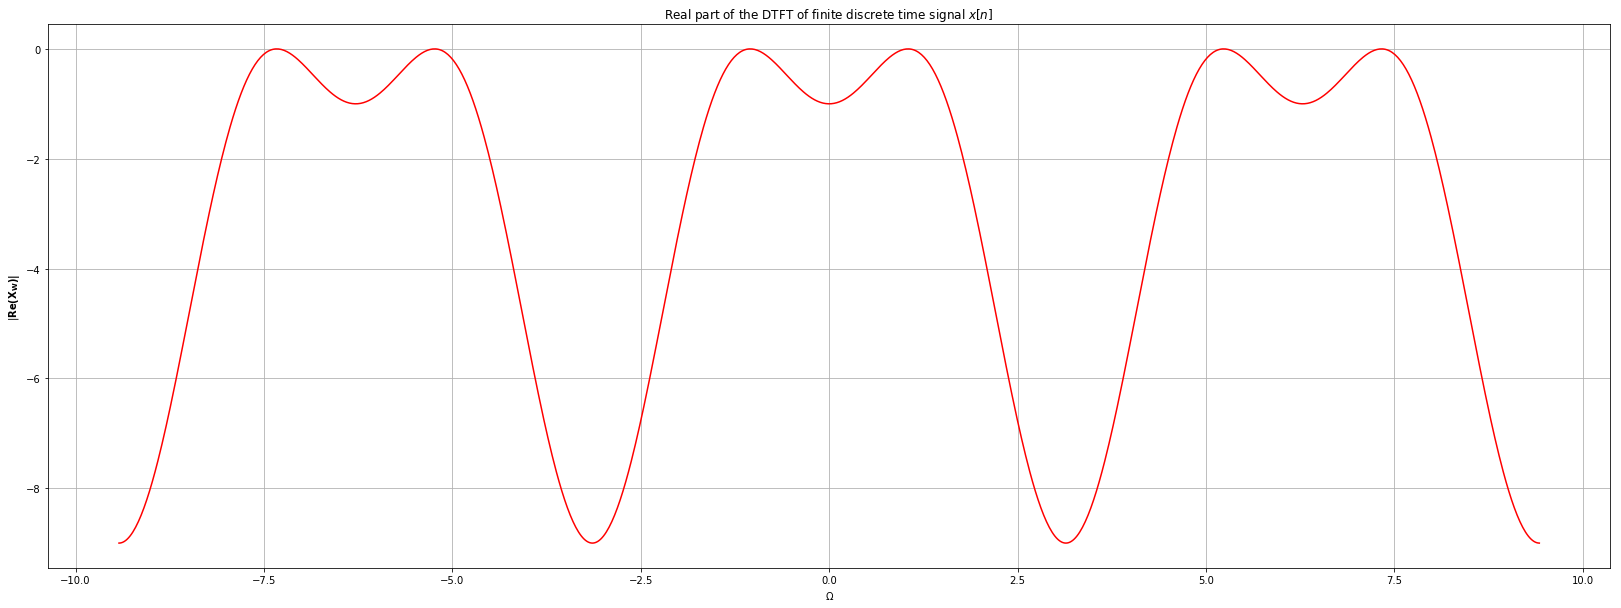

In [36]:
# plot FT
plt.figure(figsize = (28, 10))
plt.plot(Om, XN.real, 'r')
plt.title(r'Real part of the DTFT of finite discrete time signal $x[n]$')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|\bf{Re}(X_W)|$')
plt.grid()

### Discrete time signal stretching

Check the DTFT of $y[n] = x[2n]$

In [34]:
# x = [0,2,4,6,8,6,4,2,0,-2,-4,-6,-8,-6,-4,-2] * 2
r = np.linspace(-2*np.pi, 2*np.pi, 31)
x = np.sin(r)
# create y such that y[n] = x[2n]
y = [x[2*i+1] for i in range(int(len(x)/2))]

In [35]:
ftx = dtft(x, 16)
fty = dtft(y, 8)

In [43]:
u = 2
Om = np.linspace(-u * np.pi, u * np.pi, num=1024)
XN = ftx(Om)
YN = fty(Om)

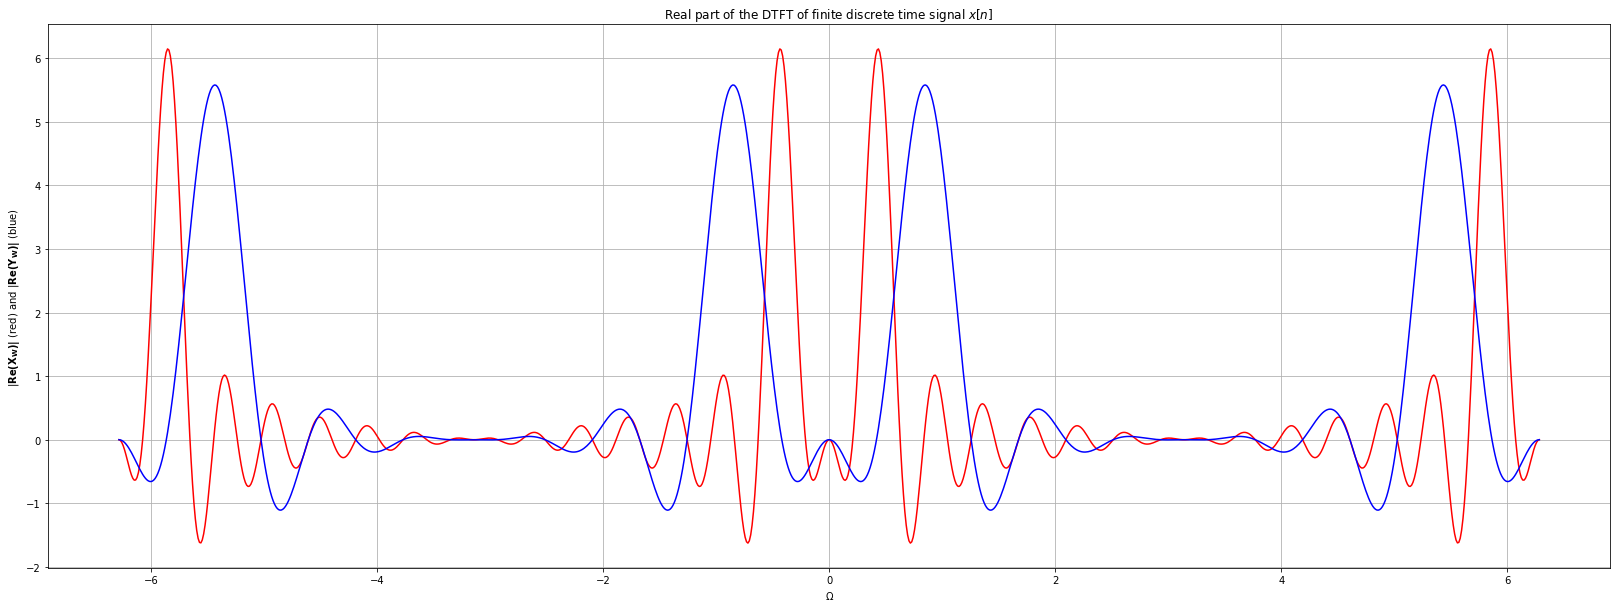

In [44]:
# plot Y[W] and X[W]
plt.figure(figsize = (28, 10))
plt.plot(Om, XN.real, 'r')
plt.plot(Om, YN.real, 'b')
# plt.plot(Om/2, YN.real, 'g')
plt.title(r'Real part of the DTFT of finite discrete time signal $x[n]$')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|\bf{Re}(X_W)|$ (red) and $|\bf{Re}(Y_W)|$ (blue)')
plt.grid()